In [1]:
!pip install yfinance ta shap scikit-learn pandas matplotlib --quiet

  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nifty_data=yf.download('^NSEI',start='2015-1-1',end='2025-1-1',progress=False)
nifty_data.to_csv("niftydata.csv")
nifty_data.head()

/tmp/ipython-input-1116011016.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data=yf.download('^NSEI',start='2015-1-1',end='2025-1-1',progress=False)


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200
2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800
2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100
2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800


In [4]:
df=nifty_data.copy()
df['daily_return']=df['Close'].pct_change()
df['daily_return']=df['daily_return']
df.to_csv("nifty_returns.csv", index=False)
df.head()


Price,Close,High,Low,Open,Volume,daily_return
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900,NaN
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,-0.002031
2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,-0.029964
2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,-0.003107
2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,0.016354


In [5]:
df = df.sort_index()

df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()

df['rolling_volitility'] = df['Close'].pct_change()
df['rolling_volitility'] = df['rolling_volitility'].rolling(window=10).mean()

df.head(10)

Price,Close,High,Low,Open,Volume,daily_return,ma5,ma20,rolling_volitility
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,
Date,,,,,,,,,
2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900,NaN,NaN,NaN,NaN
2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,-0.002031,NaN,NaN,NaN
2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,-0.029964,NaN,NaN,NaN
2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,-0.003107,NaN,NaN,NaN
2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,0.016354,8247.580078,NaN,NaN
2015-01-09,8284.500000,8303.299805,8190.799805,8285.450195,148000,0.006060,8225.390039,NaN,NaN
2015-01-12,8323.000000,8332.599609,8245.599609,8291.349609,103200,0.004647,8214.309961,NaN,NaN
2015-01-13,8299.400391,8356.650391,8267.900391,8346.150391,129600,-0.002835,8248.720020,NaN,NaN


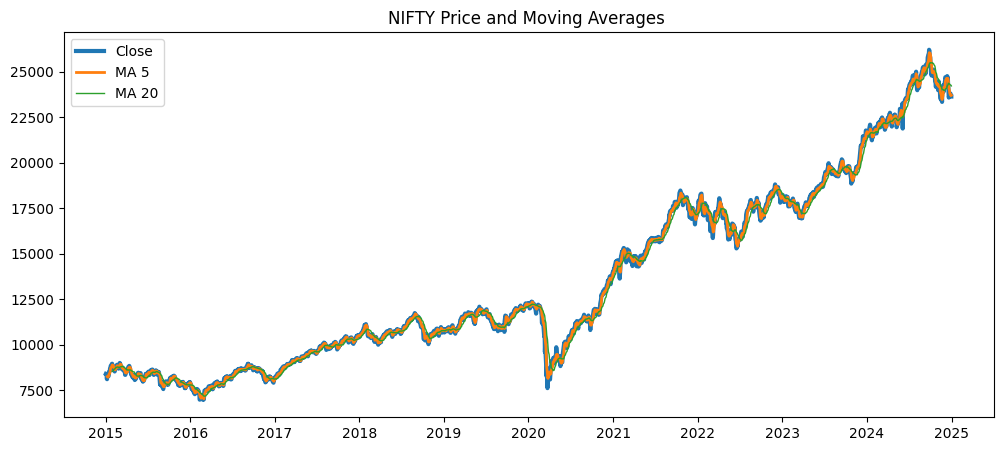

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close', linewidth=3)
plt.plot(df['ma5'], label='MA 5', linewidth=2)
plt.plot(df['ma20'], label='MA 20', linewidth=1)
plt.title("NIFTY Price and Moving Averages ")
plt.legend()
plt.show()

In [7]:
df['next_return']=df['Close'].pct_change().shift(-1)
df=df.dropna().reset_index(drop=True)
df.head()

Price,Close,High,Low,Open,Volume,daily_return,ma5,ma20,rolling_volitility,next_return
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,
0,8808.900391,8996.599609,8775.099609,8996.599609,267300,-0.016024,8884.329883,8529.457520,0.003676,-0.001305
1,8797.400391,8840.799805,8751.099609,8802.500000,210100,-0.001305,8876.690039,8549.555029,0.003314,-0.004643
2,8756.549805,8837.299805,8726.650391,8823.150391,208700,-0.004643,8845.900000,8568.462500,0.002417,-0.003751
3,8723.700195,8792.849609,8704.400391,8789.150391,195300,-0.003751,8807.780078,8598.280005,0.000347,-0.001376
4,8711.700195,8838.450195,8683.650391,8733.099609,173600,-0.001376,8759.650195,8628.760010,-0.000180,-0.005814


In [8]:
def compute_rsi(close, period=14):
    delta = close.diff()

    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

def compute_macd(close):
    ema12 = ema(close, 12)
    ema26 = ema(close, 26)
    macd = ema12 - ema26
    signal = ema(macd, 9)
    hist = macd - signal
    return macd, signal, hist
def compute_bbands(close, period=20, std_factor=2):
    mid = close.rolling(period).mean()
    std = close.rolling(period).std()

    upper = mid + std_factor * std
    lower = mid - std_factor * std

    return upper, mid, lower

In [9]:
df['rsi'] = compute_rsi(df['Close'])
df['macd'], df['signal'], df['hist'] = compute_macd(df['Close'])
df['upper'], df['mid'], df['lower'] = compute_bbands(df['Close'])
df=df.dropna().reset_index(drop=True)
df.head(10)

Price,Close,High,Low,Open,Volume,daily_return,ma5,ma20,rolling_volitility,next_return,rsi,macd,signal,hist,upper,mid,lower
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,,,,,,
0,8844.599609,8856.950195,8717.450195,8729.500000,249500,0.018511,8762.549805,8745.787402,0.001552,0.012680,60.192113,2.732109,-3.908648,6.640757,8939.752607,8745.787402,8551.822198
1,8956.750000,8972.349609,8885.450195,8953.849609,218100,0.012680,8802.909766,8753.179883,0.001742,0.004410,74.513054,17.261607,0.325403,16.936204,8967.477202,8753.179883,8538.882563
2,8996.250000,9008.400391,8925.549805,8962.849609,177800,0.004410,8849.739844,8763.122363,0.002139,-0.008181,74.521755,31.599401,6.580203,25.019198,9002.984798,8763.122363,8523.259929
3,8922.650391,9119.200195,8893.950195,9109.150391,248400,-0.008181,8880.819922,8771.427393,0.000643,0.001692,66.588025,36.601414,12.584445,24.016969,9021.611730,8771.427393,8521.243055
4,8937.750000,8957.549805,8849.349609,8929.400391,160100,0.001692,8931.600000,8782.129883,0.000516,-0.020251,63.777583,41.307787,18.329113,22.978673,9041.849336,8782.129883,8522.410430
5,8756.750000,8891.299805,8740.450195,8891.150391,155500,-0.020251,8914.030078,8784.382373,-0.000815,-0.005105,47.315378,30.085626,20.680416,9.405210,9042.305146,8784.382373,8526.459600
6,8712.049805,8778.000000,8677.349609,8769.750000,163800,-0.005105,8865.090039,8786.932373,-0.000435,-0.001389,44.872480,17.384651,20.021263,-2.636612,9040.695949,8786.932373,8533.168797
7,8699.950195,8755.599609,8682.349609,8728.750000,172800,-0.001389,8805.830078,8795.612402,-0.000656,0.008741,40.614796,6.270418,17.271094,-11.000676,9022.275351,8795.612402,8568.949454
8,8776.000000,8787.200195,8732.900391,8740.650391,173900,0.008741,8776.500000,8806.134912,0.000160,-0.014614,43.727659,3.557878,14.528451,-10.970572,9005.754456,8806.134912,8606.515368


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

In [12]:
print(df.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'daily_return', 'ma5', 'ma20',
       'rolling_volitility', 'next_return', 'rsi', 'macd', 'signal', 'hist',
       'upper', 'mid', 'lower'],
      dtype='object')


In [13]:
remove_cols = ["next_return"]

features = [c for c in df.columns if c not in remove_cols]

print("Features used:", features)

Features used: ['Close', 'High', 'Low', 'Open', 'Volume', 'daily_return', 'ma5', 'ma20', 'rolling_volitility', 'rsi', 'macd', 'signal', 'hist', 'upper', 'mid', 'lower']


In [14]:
split = int(len(df) * 0.8)

train = df.iloc[:split]
test  = df.iloc[split:]

X_train = train[features]
X_test  = test[features]

y_train = train["next_return"]
y_test  = test["next_return"]

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

LINEAR REG


In [16]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)

Random Forest Reg


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [18]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

model.fit(X_train_scaled, y_train)
pred_xgb = model.predict(X_test_scaled)

In [19]:
def evaluate_model(pred, name):
    mae = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred)
    direction_acc = ((pred > 0) == (y_test > 0)).mean()

    print(f"\n{name} Results:")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("Direction Accuracy:", direction_acc)

evaluate_model(pred_lr, "Linear Regression")
evaluate_model(pred_rf, "Random Forest")
evaluate_model(pred_xgb, "XG Boost")


Linear Regression Results:
MAE: 0.005596389774954301
RMSE: 6.078964150181571e-05
Direction Accuracy: 0.4690082644628099

Random Forest Results:
MAE: 0.005618127210372833
RMSE: 5.826647900804736e-05
Direction Accuracy: 0.4607438016528926

XG Boost Results:
MAE: 0.006926096743685368
RMSE: 7.877918157699553e-05
Direction Accuracy: 0.45867768595041325


In [20]:
test["pred_rf"] = pred_rf
test["position"] = (test["pred_rf"] > 0).astype(int)

test["strategy_return"] = test["position"] * test["next_return"]
test["cum_strategy"] = (1 + test["strategy_return"]).cumprod()

test["cum_buy_hold"] = (1 + test["next_return"]).cumprod()

/tmp/ipython-input-3583859695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_rf"] = pred_rf
/tmp/ipython-input-3583859695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["position"] = (test["pred_rf"] > 0).astype(int)
/tmp/ipython-input-3583859695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

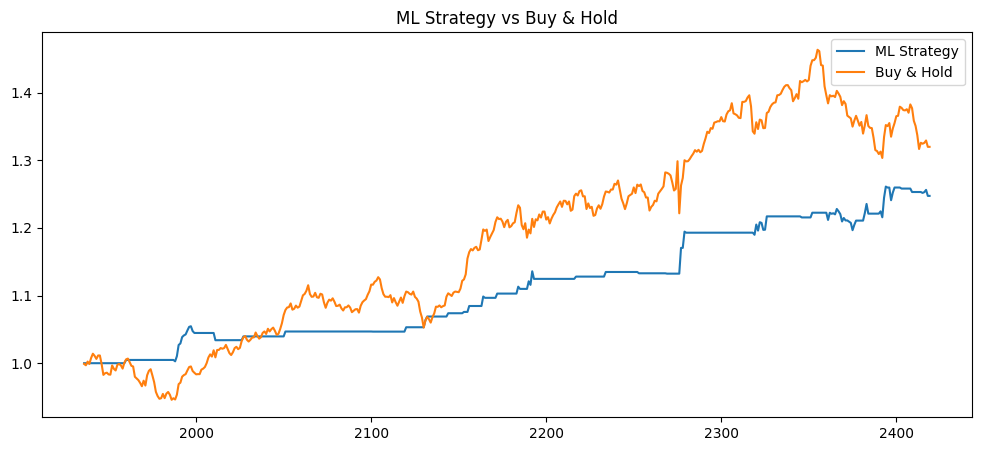

In [21]:
plt.figure(figsize=(12,5))
plt.plot(test["cum_strategy"], label="ML Strategy")
plt.plot(test["cum_buy_hold"], label="Buy & Hold")
plt.legend()
plt.title("ML Strategy vs Buy & Hold")
plt.show()

<Figure size 1000x800 with 0 Axes>

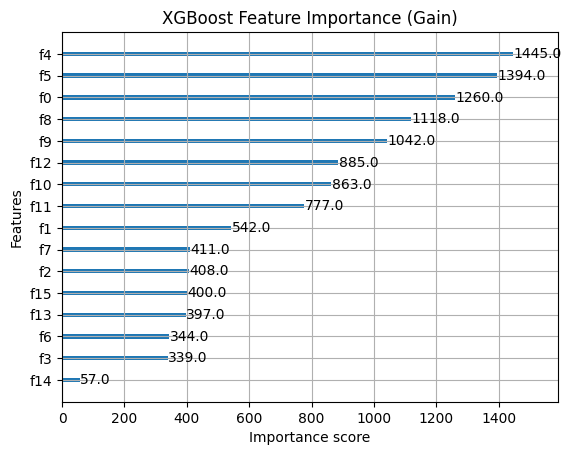

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()

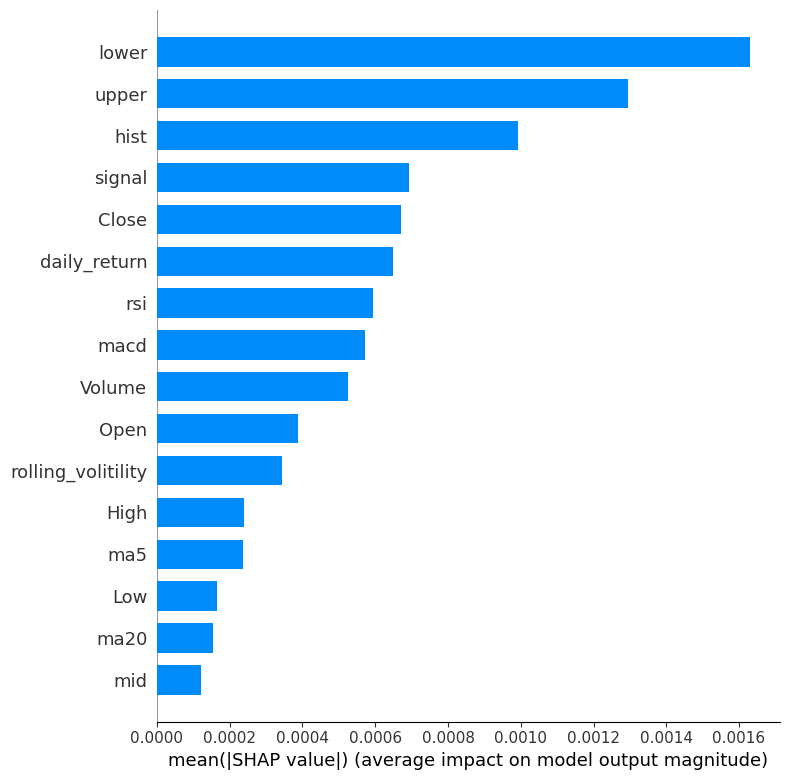

In [23]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")